# Test Structure

## Load the test structure (example 1)

### Load custom modules

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../'))

from src.modules.strcture import Structure

### Load external modules

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 

### Csv file for the structure

In [3]:
pd.read_csv('./structures/example_1.csv') 

,x,y,n1,n2,n3,ddl,Px,Py
0,0,200,0,1,1,0,0,0
1,200,0,1,0,1,3,0,-10000
2,0,-200,1,1,0,2,0,0


### Build structure from csv file

In [4]:
structure = Structure.from_csv('./structures/example_1.csv')

### Nodes under this structure

In [5]:
structure.nodes

{(0.0, 200.0): <src.modules.node.Node at 0x7f7a4ec4bb20>,
 (200.0, 0.0): <src.modules.node.Node at 0x7f7a4ec4bb50>,
 (0.0, -200.0): <src.modules.node.Node at 0x7f7a4ec4bc40>}

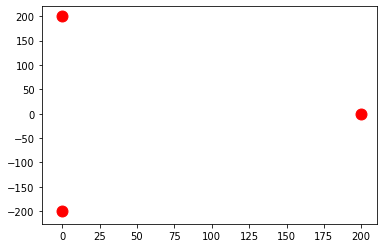

In [6]:
for node in structure.nodes.values():
    plt.scatter([node.x], [node.y], color='r',
                       zorder=2,
                       s=120)

### Bars under this structure

In [7]:
structure.bars

{frozenset({0, 1}): <src.modules.bar.Bar at 0x7f7a4ec4bbb0>,
 frozenset({0, 2}): <src.modules.bar.Bar at 0x7f7a4ec4bb80>,
 frozenset({1, 2}): <src.modules.bar.Bar at 0x7f7a4ec4bc70>}

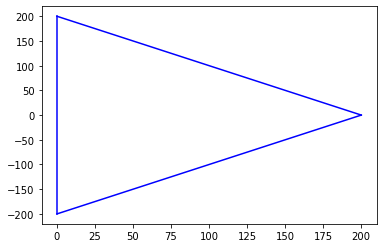

In [8]:
 for bar in structure.bars.values():
    plt.plot([bar.from_x, bar.to_x], [bar.from_y, bar.to_y], color='b', zorder=1)

### Visialuzation of the whole structure

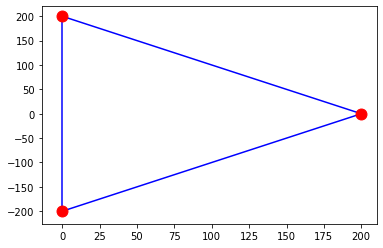

In [9]:
structure.draw(show=False)

### Calculate the stifness matrix for the bar(1-3)

In [10]:
E = 200000
A = 100

In [11]:
structure.bars[frozenset((0, 2))].calculate_k(A, E)

array([[     0.,     -0.,      0.,      0.,     -0.,      0.],
       [    -0.,  50000.,      0.,      0.,      0., -50000.],
       [     0.,      0.,      0.,      0.,      0.,      0.],
       [     0.,      0.,      0.,      0.,      0.,      0.],
       [    -0.,      0.,      0.,      0.,      0.,     -0.],
       [     0., -50000.,      0.,      0.,     -0.,  50000.]])

### Calculate the stifness matrix for the whole structure

In [12]:
k, _, _ = structure.calculate_ll_k_with_forces(A, E)

print(k)

[[ 70710.67811865      0.         -35355.33905933]
 [     0.          70710.67811865 -35355.33905933]
 [-35355.33905933 -35355.33905933  85355.33905933]]


### Unknown displacements for this structure

In [13]:
_, _, unknown_displacements = structure.calculate_ll_k_with_forces(A, E)

for i in unknown_displacements:
    if i % 2 == 0:
        print(f'u{(i // 2) + 1}')
    else:
        print(f'v{(i // 2) + 1}')

u2
v2
v3


### Calculate the displacenemts

In [14]:
displacements = structure.calculate_displacements(A, E)

for i, displacement in enumerate(displacements):
    if i % 2 == 0:
        print(f'u{(i // 2) + 1}', '=', displacement, 'mm')
    else:
        print(f'v{(i // 2) + 1}', '=', displacement, 'mm')

u1 = 0.0 mm
v1 = 0.0 mm
u2 = -0.05 mm
v2 = -0.1914213562373095 mm
u3 = 0.0 mm
v3 = -0.1 mm


### Calculate deformation Energy

In [15]:
str(structure.calculate_deformation_energy(A, E)) + 'mJ'

'957.1067811865474mJ'

## Load the test structure (example 2)

### Load custom modules

### Csv file for the structure

In [16]:
pd.read_csv('./structures/example_2.csv')

,x,y,n1,n2,n3,ddl,Px,Py
0,0,0,0,1,1,0,0,0
1,0,700,1,0,1,2,0,0
2,700,0,1,1,0,3,-120000,-360000


### Build structure from csv file

In [17]:
structure = Structure.from_csv('./structures/example_2.csv')

### Nodes under this structure

In [18]:
structure.nodes

{(0.0, 0.0): <src.modules.node.Node at 0x7f7a4a83c400>,
 (0.0, 700.0): <src.modules.node.Node at 0x7f7a4a83c850>,
 (700.0, 0.0): <src.modules.node.Node at 0x7f7a4a83c880>}

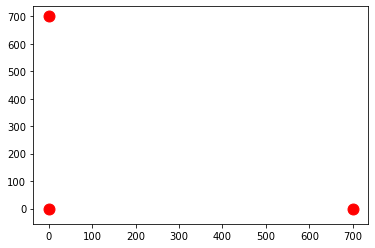

In [19]:
for node in structure.nodes.values():
    plt.scatter([node.x], [node.y], color='r',
                       zorder=2,
                       s=120)

### Bars under this structure

In [20]:
structure.bars

{frozenset({0, 1}): <src.modules.bar.Bar at 0x7f7a4a83ca90>,
 frozenset({0, 2}): <src.modules.bar.Bar at 0x7f7a4a83cbb0>,
 frozenset({1, 2}): <src.modules.bar.Bar at 0x7f7a4a83cd00>}

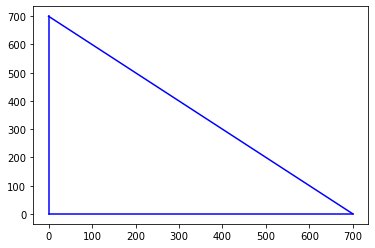

In [21]:
 for bar in structure.bars.values():
    plt.plot([bar.from_x, bar.to_x], [bar.from_y, bar.to_y], color='b', zorder=1)

### Visialuzation of the whole structure

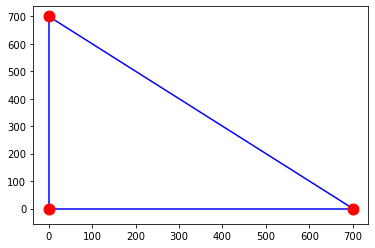

In [22]:
structure.draw(show=False)

### Calculate the stifness matrix for the bar(1-3)

In [23]:
E = 200000
A = 10000

In [24]:
structure.bars[frozenset((0, 2))].calculate_k(A, E)

array([[ 2857142.85714286,        0.        ,        0.        ,
               0.        , -2857142.85714286,       -0.        ],
       [       0.        ,        0.        ,        0.        ,
               0.        ,       -0.        ,       -0.        ],
       [       0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ],
       [       0.        ,        0.        ,        0.        ,
               0.        ,        0.        ,        0.        ],
       [-2857142.85714286,       -0.        ,        0.        ,
               0.        ,  2857142.85714286,        0.        ],
       [      -0.        ,       -0.        ,        0.        ,
               0.        ,        0.        ,        0.        ]])

### Calculate the stifness matrix for the whole structure

In [25]:
k, _, _ = structure.calculate_ll_k_with_forces(A, E)

print(k)

[[ 3867295.40169507  1010152.54455221 -1010152.54455221]
 [ 1010152.54455221  3867295.40169507 -1010152.54455221]
 [-1010152.54455221 -1010152.54455221  1010152.54455221]]


### Unknown displacements for this structure

In [26]:
_, _, unknown_displacements = structure.calculate_ll_k_with_forces(A, E)

for i in unknown_displacements:
    if i % 2 == 0:
        print(f'u{(i // 2) + 1}')
    else:
        print(f'v{(i // 2) + 1}')

v2
u3
v3


### Calculate the displacenemts

In [27]:
displacements = structure.calculate_displacements(A, E)

for i, displacement in enumerate(displacements):
    if i % 2 == 0:
        print(f'u{(i // 2) + 1}', '=', displacement, 'mm')
    else:
        print(f'v{(i // 2) + 1}', '=', displacement, 'mm')

u1 = 0.0 mm
v1 = 0.0 mm
u2 = 0.0 mm
v2 = -0.12599999999999997 mm
u3 = -0.16800000000000004 mm
v3 = -0.6503818177180201 mm


### Calculate deformation Energy

In [28]:
str(structure.calculate_deformation_energy(A, E)) + 'mJ'

'127148.72718924363mJ'

## Load a random structure

### Load custom modules

### Csv file for the structure

In [29]:
pd.read_csv('./structures/data.csv')

,x,y,n1,n2,n3,n4,n5,n6,ddl,Px,Py
0,0.0,0.0,0,1,0,1,1,1,3,0,0
1,0.5,0.0,1,0,1,1,1,1,0,0,-2000
2,1.0,0.0,0,1,0,1,1,1,3,0,0
3,1.0,0.5,1,1,1,0,1,0,0,0,0
4,0.5,0.5,1,1,1,1,0,1,0,0,0
5,0.0,0.5,1,1,1,0,1,0,0,0,0


### Build structure from csv file

In [30]:
structure = Structure.from_csv('./structures/data.csv')

### Nodes under this structure

In [31]:
structure.nodes

{(0.0, 0.0): <src.modules.node.Node at 0x7f7a4a6f89d0>,
 (0.5, 0.0): <src.modules.node.Node at 0x7f7a4a6f8c10>,
 (1.0, 0.0): <src.modules.node.Node at 0x7f7a4a6f84f0>,
 (1.0, 0.5): <src.modules.node.Node at 0x7f7a4a6f86a0>,
 (0.5, 0.5): <src.modules.node.Node at 0x7f7a4a835940>,
 (0.0, 0.5): <src.modules.node.Node at 0x7f7a4a835c10>}

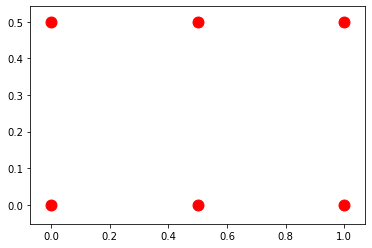

In [32]:
for node in structure.nodes.values():
    plt.scatter([node.x], [node.y], color='r',
                       zorder=2,
                       s=120)

### Bars under this structure

In [33]:
structure.bars

{frozenset({0, 1}): <src.modules.bar.Bar at 0x7f7a4a6f8ee0>,
 frozenset({0, 3}): <src.modules.bar.Bar at 0x7f7a4a6f83d0>,
 frozenset({0, 4}): <src.modules.bar.Bar at 0x7f7a4a6f8a00>,
 frozenset({0, 5}): <src.modules.bar.Bar at 0x7f7a4a6f8400>,
 frozenset({1, 2}): <src.modules.bar.Bar at 0x7f7a4a6f8a30>,
 frozenset({1, 3}): <src.modules.bar.Bar at 0x7f7a4a6f8550>,
 frozenset({1, 4}): <src.modules.bar.Bar at 0x7f7a4a6f88b0>,
 frozenset({1, 5}): <src.modules.bar.Bar at 0x7f7a4a6f8430>,
 frozenset({2, 3}): <src.modules.bar.Bar at 0x7f7a4c99c3a0>,
 frozenset({2, 4}): <src.modules.bar.Bar at 0x7f7a4c99cb50>,
 frozenset({2, 5}): <src.modules.bar.Bar at 0x7f7a4a835fd0>,
 frozenset({3, 4}): <src.modules.bar.Bar at 0x7f7a4a835910>,
 frozenset({4, 5}): <src.modules.bar.Bar at 0x7f7a4ea07310>}

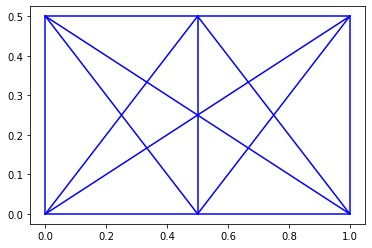

In [34]:
 for bar in structure.bars.values():
    plt.plot([bar.from_x, bar.to_x], [bar.from_y, bar.to_y], color='b', zorder=1)

### Visialuzation of the whole structure

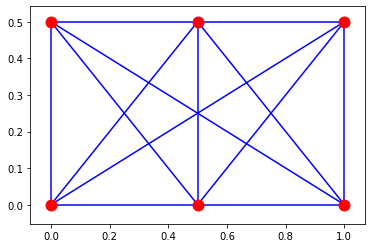

In [35]:
structure.draw(show=False)

### Calculate the stifness matrix for the bar(1-2)

In [36]:
E = 200000
A = 300

In [37]:
structure.bars[frozenset((0, 1))].calculate_k(A, E)

array([[ 1.2e+08,  0.0e+00, -1.2e+08, -0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00, -0.0e+00, -0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [-1.2e+08, -0.0e+00,  1.2e+08,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [-0.0e+00, -0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,
         0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00,  0.0e+00],
       [ 0.0e+00,  0.0e+00,  0.0e+00,  0.

### Calculate the stifness matrix for the whole structure

In [38]:
k, _, _ = structure.calculate_ll_k_with_forces(A, E)

print(k)

[[ 2.05358912e+08  6.38926595e+07  0.00000000e+00  0.00000000e+00]
 [ 6.38926595e+07  1.73159533e+08  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  2.05358912e+08 -6.38926595e+07]
 [ 0.00000000e+00  0.00000000e+00 -6.38926595e+07  1.73159533e+08]]


### Unknown displacements for this structure

In [39]:
_, _, unknown_displacements = structure.calculate_ll_k_with_forces(A, E)

for i in unknown_displacements:
    if i % 2 == 0:
        print(f'u{(i // 2) + 1}')
    else:
        print(f'v{(i // 2) + 1}')

u1
v1
u3
v3


### Calculate the displacenemts

In [40]:
displacements = structure.calculate_displacements(A, E)

for i, displacement in enumerate(displacements):
    if i % 2 == 0:
        print(f'u{(i // 2) + 1}', '=', displacement, 'mm')
    else:
        print(f'v{(i // 2) + 1}', '=', displacement, 'mm')

u1 = 0.0 mm
v1 = 0.0 mm
u2 = 0.0 mm
v2 = 0.0 mm
u3 = 0.0 mm
v3 = 0.0 mm
u4 = 0.0 mm
v4 = 0.0 mm
u5 = 0.0 mm
v5 = 0.0 mm
u6 = 0.0 mm
v6 = 0.0 mm


### Calculate deformation Energy

In [41]:
str(structure.calculate_deformation_energy(A, E)) + 'mJ'

'0.0mJ'

# Genetic Algorithm

### Apply genetic algorithm to minimize the Edef for example 1

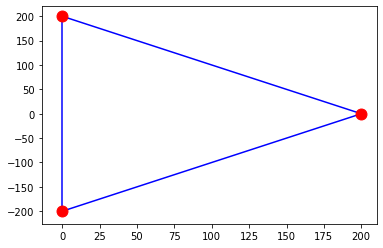

In [42]:
structure = Structure.from_csv('./structures/example_1.csv')
structure.draw(show=False)

### Running the GA against Edef to minimize it

In [43]:
E = 200000

#### Define a cost function for our problem

In [44]:
def calculate_energy(x):
    return structure.calculate_deformation_energy(E, x[0])

#### Create a GA instance with all the necessary parameters

In [45]:
from src.modules.genetic_algorithm import GeneticAlgorithm

genetic_algorithm = GeneticAlgorithm(
    cost_function=calculate_energy,
    variables_min_range=[0.000000001],
    variables_max_range=[10000],
    max_iterations=100,
    population=50,
    beta=1,
    pc=1,
    gamma=0.1,
    mutation_rate=0.01,
    sigma=0.1
)

#### Train the GA

In [46]:
best_solution = genetic_algorithm.run()

print('Best Solution:', best_solution.variables, 'Best Cost:', best_solution.cost)

Best Solution: [10000.] Best Cost: 9.57106781186547


#### Plot the cost over time

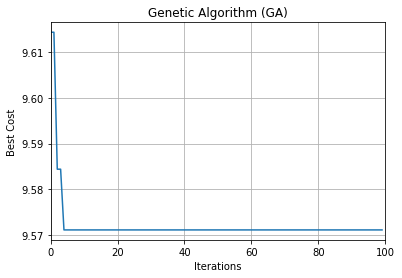

In [47]:
plt.plot(genetic_algorithm.cost_history)
plt.xlim(0, genetic_algorithm.max_iterations)
plt.xlabel('Iterations')
plt.ylabel('Best Cost')
plt.title('Genetic Algorithm (GA)')
plt.grid(True)